# Prepare raw data for curvecurator

In [1]:
import pandas as pd
from pathlib import Path
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pubchempy as pcp
from Bio.ExPASy import cellosaurus
from drevalpy.datasets.curvecurator import _exec_curvecurator, postprocess

## Load Data

In [2]:
RAW_FILE_PATH = Path("GDSC2_public_raw_data_27Oct23.csv")

In [3]:
raw_df = pd.read_csv(RAW_FILE_PATH)
raw_df

,RESEARCH_PROJECT,BARCODE,SCAN_ID,DATE_CREATED,SCAN_DATE,CELL_ID,MASTER_CELL_ID,COSMIC_ID,CELL_LINE_NAME,SANGER_MODEL_ID,SEEDING_DENSITY,DRUGSET_ID,ASSAY,DURATION,POSITION,TAG,DRUG_ID,CONC,INTENSITY
0,GDSC_SA,3230,2945,2015-02-13T00:00:00Z,2015-02-17T00:00:00Z,4712,198,753608,PC-14,SIDM00237,250,159,Glo,4,1,UN-USED,NaN,NaN,0
1,GDSC_SA,3230,2945,2015-02-13T00:00:00Z,2015-02-17T00:00:00Z,4712,198,753608,PC-14,SIDM00237,250,159,Glo,4,2,UN-USED,NaN,NaN,0
2,GDSC_SA,3230,2945,2015-02-13T00:00:00Z,2015-02-17T00:00:00Z,4712,198,753608,PC-14,SIDM00237,250,159,Glo,4,3,UN-USED,NaN,NaN,398
3,GDSC_SA,3230,2945,2015-02-13T00:00:00Z,2015-02-17T00:00:00Z,4712,198,753608,PC-14,SIDM00237,250,159,Glo,4,4,UN-USED,NaN,NaN,796
4,GDSC_SA,3230,2945,2015-02-13T00:00:00Z,2015-02-17T00:00:00Z,4712,198,753608,PC-14,SIDM00237,250,159,Glo,4,5,UN-USED,NaN,NaN,796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15069444,GDSC_Panc-Validation,63249,58272,2020-03-16T00:00:00Z,2020-03-20T00:00:00Z,12810,1843,1298141,Hs-766T,SIDM00664,325,630,Glo,4,1532,UN-USED,NaN,NaN,8504
15069445,GDSC_Panc-Validation,63249,58272,2020-03-16T00:00:00Z,2020-03-20T00:00:00Z,12810,1843,1298141,Hs-766T,SIDM00664,325,630,Glo,4,1533,UN-USED,NaN,NaN,5255
15069446,GDSC_Panc-Validation,63249,58272,2020-03-16T00:00:00Z,2020-03-20T00:00:00Z,12810,1843,1298141,Hs-766T,SIDM00664,325,630,Glo,4,1534,UN-USED,NaN,NaN,1051
15069447,GDSC_Panc-Validation,63249,58272,2020-03-16T00:00:00Z,2020-03-20T00:00:00Z,12810,1843,1298141,Hs-766T,SIDM00664,325,630,Glo,4,1535,UN-USED,NaN,NaN,191


In [4]:
drug_names = pd.read_csv("screened_compounds_rel_8.5.csv")
drug_names["DRUG_NAME"] = drug_names.DRUG_NAME.apply(lambda x: x[:-1] if x[-1] == ' ' else x)  # remove trailing spaces for 'GSK-LSD1-2HCl', 'JAK1_8517'
drug_names

,DRUG_ID,SCREENING_SITE,DRUG_NAME,SYNONYMS,TARGET,TARGET_PATHWAY
0,1,MGH,Erlotinib,"Tarceva, RG-1415, CP-358774, OSI-774, Ro-50823...",EGFR,EGFR signaling
1,3,MGH,Rapamycin,"AY-22989, Sirolimus, WY-090217, Torisel, Rapamune",MTORC1,PI3K/MTOR signaling
2,5,MGH,Sunitinib,"Sutent, Sunitinib Malate, SU-11248","PDGFR, KIT, VEGFR, FLT3, RET, CSF1R",RTK signaling
3,6,MGH,PHA-665752,"PHA665752, PHA 665752",MET,RTK signaling
4,9,MGH,MG-132,"LLL cpd, MG 132, MG132","Proteasome, CAPN1",Protein stability and degradation
...,...,...,...,...,...,...
616,2362,SANGER,THR-103,WIMM synthesis,Mutant RAS,PI3K/MTOR signaling
617,2438,SANGER,ascorbate (vitamin C),back-up solution from YWKim,anti-oxidant proteins,Other
618,2439,SANGER,glutathione,"G6013, sigma",anti-oxidant proteins,Other
619,2498,SANGER,alpha-lipoic acid,aLA,Metabolism,Metabolism


In [5]:
# Remove failed drugs from the dataset
def remove_failed_drugs(df):
    # Remove rows where TAG == 'UN-USED'
    failed_positions = df[df['TAG'] == 'UN-USED'][['SCAN_ID', 'POSITION']]
    df = df.merge(failed_positions, on=['SCAN_ID', 'POSITION'], how='outer', indicator=True)
    df = df[df['_merge'] == 'left_only'].drop(columns='_merge')
    return df

# Remove missing drugs (where DRUG_ID is NA)
def remove_missing_drugs(df):
    # Remove rows where DRUG_ID is NA
    na_libs = df[df['DRUG_ID'].isna() & df['TAG'].str.contains("^(L|R|A)\d+", regex=True)]
    df = df.merge(na_libs[['SCAN_ID', 'POSITION']], on=['SCAN_ID', 'POSITION'], how='outer', indicator=True)
    df = df[df['_merge'] == 'left_only'].drop(columns='_merge')
    return df

# Calculate the mean intensity for a given tag
def calc_tag_mean(df, tag_name, mean_col_name="tag_mean"):
    # Check if tag exists for all SCAN_IDs
    check_for_tag = df[['SCAN_ID']].drop_duplicates().merge(
        df[df['TAG'] == tag_name].groupby('SCAN_ID').size().reset_index(name='count'),
        on='SCAN_ID', how='left'
    )
    if check_for_tag['count'].isna().any():
        print(check_for_tag['count'])
        raise ValueError(f"calcTagMean: {tag_name} is not present for some or all of the SCAN_IDs.")
    
    # Calculate mean intensity for the tag
    tag_means = df[df['TAG'] == tag_name].groupby('SCAN_ID')['INTENSITY'].mean().reset_index(name=mean_col_name)
    
    if tag_means[mean_col_name].isna().any():
        raise ValueError(f"calcTagMean: {tag_name} has a mean of NaN for some or all of the SCAN_IDs.")
    
    return tag_means

# Normalize the dataset with respect to controls
def normalize_data(df, trim=True, neg_control='NC-1', pos_control='B'):
    nc1 = calc_tag_mean(df, neg_control, "NC")
    pc1 = calc_tag_mean(df, pos_control, "PC")
    
    # Filter and select relevant columns
    normalized_data = df[df['TAG'].str.contains(r"(A|L|R)\d+(-D\d+)?-(S|C)")].copy()
    
    normalized_data['lib_drug'] = normalized_data['TAG'].str.extract(r"((L|R)\d+)(-D\d+)?-(S|C)")[0]
    normalized_data['lib_drug'] = np.where(normalized_data['lib_drug'].str.startswith("A"), np.nan, normalized_data['lib_drug'])
    
    normalized_data['anchor'] = normalized_data['TAG'].str.extract(r"(A\d+)-(S|C)")[0]
    normalized_data['anchor'] = np.where(normalized_data['anchor'].str.startswith("(L|R)"), np.nan, normalized_data['anchor'])
    
    normalized_data['dose'] = normalized_data['TAG'].str.extract(r"(A|L|R)\d+-?(D\d+)?-(S|C)")[1]
    normalized_data['treatment'] = normalized_data['TAG'].str.extract(r"((A|L|R)\d+)(-D\d+)?-(S|C)")[3]
    
    # Join library and anchor data
    libraries = normalized_data.loc[~normalized_data['lib_drug'].isna(), normalized_data.columns != 'anchor'].rename(columns={"DRUG_ID": "DRUG_ID_lib"}).copy()
    anchors = normalized_data.loc[~normalized_data['anchor'].isna(), ~normalized_data.columns.isin(["lib_drug", "dose"])].rename(columns={"DRUG_ID": "DRUG_ID_anch", "CONC": "CONC_anch"})
    
    if not anchors.empty:
        normalized_data = pd.merge(libraries, anchors, how='outer')
    else:
        normalized_data = libraries
    
    # Merge controls
    normalized_data = normalized_data.merge(nc1, on="SCAN_ID", how='left').merge(pc1, on="SCAN_ID", how='left')
    
    # Normalize intensity
    normalized_data['normalized_intensity'] = (normalized_data['INTENSITY'] - normalized_data['PC']) / (normalized_data['NC'] - normalized_data['PC'])
    
    # Trim values to range [0, 1]
    if trim:
        normalized_data['normalized_intensity'] = normalized_data['normalized_intensity'].clip(lower=0, upper=1000)
    
    normalized_data['norm_neg_pos'] = neg_control + "+" + pos_control
    #normalized_data['time_stamp'] = datetime.now()
    
    return normalized_data

# Main normalization function
def main_normalizer(gdsc_dataset):
    return normalize_data(remove_missing_drugs(remove_failed_drugs(gdsc_dataset)))

# Add DMSO controls
def add_dmso(df):
    unique_pairs = df[['cell_line', 'drug']].drop_duplicates()
    new_rows = unique_pairs.assign(dose=0, response=1.0)
    final_dataset = pd.concat([df, new_rows], ignore_index=True)
    return final_dataset

# Map drug names
def drug_name_mapper(df, drug_df):
    drug_df = drug_df[['DRUG_ID', 'DRUG_NAME', 'SYNONYMS', 'SCREENING_SITE']]#.rename(columns={'DRUG_ID': 'drug'})
    df = df.merge(drug_df, left_on='DRUG_ID_lib', right_on='DRUG_ID', how='left')
    df['DRUG_NAME'] = df['DRUG_NAME'].fillna(df['DRUG_ID_lib'].astype(str))
    return df.drop(columns='DRUG_ID').rename(columns={'DRUG_ID_lib': 'DRUG_ID'})

# Prepare the dataset for curve curator
def transform_for_curvecurator(df, drug_names):
    # Filter library drugs
    df = df[df['lib_drug'].str.startswith('L')]
    
    # Select relevant columns and rename them
    df = df.copy()
    #df.columns = ['cell_line', 'drug', 'dose', 'response', 'SANGER_MODEL_ID', "CELL_ID", "MASTER_CELL_ID"]
    
    # Add DMSO controls
    #df = add_dmso(df)
    
    # Map drug names
    df = drug_name_mapper(df, drug_names)
    # Reorder and sort columns
    df = df.sort_values(by=['CELL_LINE_NAME', 'DRUG_ID', 'CONC'])
    
    return df



## Prepare data

In [6]:
raw_df_without_empty_wells = remove_failed_drugs(raw_df)
raw_df_without_empty_wells

,RESEARCH_PROJECT,BARCODE,SCAN_ID,DATE_CREATED,SCAN_DATE,CELL_ID,MASTER_CELL_ID,COSMIC_ID,CELL_LINE_NAME,SANGER_MODEL_ID,SEEDING_DENSITY,DRUGSET_ID,ASSAY,DURATION,POSITION,TAG,DRUG_ID,CONC,INTENSITY
96,GDSC_SA,3230,2945,2015-02-13T00:00:00Z,2015-02-17T00:00:00Z,4712,198,753608,PC-14,SIDM00237,250,159,Glo,4,97,B,NaN,NaN,0
98,GDSC_SA,3230,2945,2015-02-13T00:00:00Z,2015-02-17T00:00:00Z,4712,198,753608,PC-14,SIDM00237,250,159,Glo,4,99,NC-1,4000.0,NaN,38027
99,GDSC_SA,3230,2945,2015-02-13T00:00:00Z,2015-02-17T00:00:00Z,4712,198,753608,PC-14,SIDM00237,250,159,Glo,4,100,R1-D1-S,1003.0,0.10,23093
100,GDSC_SA,3230,2945,2015-02-13T00:00:00Z,2015-02-17T00:00:00Z,4712,198,753608,PC-14,SIDM00237,250,159,Glo,4,101,R2-D1-S,1060.0,0.25,38426
101,GDSC_SA,3230,2945,2015-02-13T00:00:00Z,2015-02-17T00:00:00Z,4712,198,753608,PC-14,SIDM00237,250,159,Glo,4,102,L3-D1-S,1593.0,10.00,19310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15069346,GDSC_Panc-Validation,63249,58272,2020-03-16T00:00:00Z,2020-03-20T00:00:00Z,12810,1843,1298141,Hs-766T,SIDM00664,325,630,Glo,4,1435,NC-1,4000.0,NaN,15384
15069347,GDSC_Panc-Validation,63249,58272,2020-03-16T00:00:00Z,2020-03-20T00:00:00Z,12810,1843,1298141,Hs-766T,SIDM00664,325,630,Glo,4,1436,PC1-D1-S,1862.0,4.00,4586
15069348,GDSC_Panc-Validation,63249,58272,2020-03-16T00:00:00Z,2020-03-20T00:00:00Z,12810,1843,1298141,Hs-766T,SIDM00664,325,630,Glo,4,1436,DMSO,4000.0,NaN,4586
15069349,GDSC_Panc-Validation,63249,58272,2020-03-16T00:00:00Z,2020-03-20T00:00:00Z,12810,1843,1298141,Hs-766T,SIDM00664,325,630,Glo,4,1437,NC-1,4000.0,NaN,17391


In [7]:
raw_df_with_drugs_only = remove_missing_drugs(raw_df_without_empty_wells)
raw_df_with_drugs_only

/var/folders/3x/f8j9tddj7flfxt9zx1gkws1m0000gn/T/ipykernel_33279/2350327.py:12: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  na_libs = df[df['DRUG_ID'].isna() & df['TAG'].str.contains("^(L|R|A)\d+", regex=True)]


,RESEARCH_PROJECT,BARCODE,SCAN_ID,DATE_CREATED,SCAN_DATE,CELL_ID,MASTER_CELL_ID,COSMIC_ID,CELL_LINE_NAME,SANGER_MODEL_ID,SEEDING_DENSITY,DRUGSET_ID,ASSAY,DURATION,POSITION,TAG,DRUG_ID,CONC,INTENSITY
0,GDSC_SA,3230,2945,2015-02-13T00:00:00Z,2015-02-17T00:00:00Z,4712,198,753608,PC-14,SIDM00237,250,159,Glo,4,97,B,NaN,NaN,0
1,GDSC_SA,3230,2945,2015-02-13T00:00:00Z,2015-02-17T00:00:00Z,4712,198,753608,PC-14,SIDM00237,250,159,Glo,4,99,NC-1,4000.0,NaN,38027
2,GDSC_SA,3230,2945,2015-02-13T00:00:00Z,2015-02-17T00:00:00Z,4712,198,753608,PC-14,SIDM00237,250,159,Glo,4,100,R1-D1-S,1003.0,0.10,23093
3,GDSC_SA,3230,2945,2015-02-13T00:00:00Z,2015-02-17T00:00:00Z,4712,198,753608,PC-14,SIDM00237,250,159,Glo,4,101,R2-D1-S,1060.0,0.25,38426
4,GDSC_SA,3230,2945,2015-02-13T00:00:00Z,2015-02-17T00:00:00Z,4712,198,753608,PC-14,SIDM00237,250,159,Glo,4,102,L3-D1-S,1593.0,10.00,19310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10555740,GDSC_Panc-Validation,63249,58272,2020-03-16T00:00:00Z,2020-03-20T00:00:00Z,12810,1843,1298141,Hs-766T,SIDM00664,325,630,Glo,4,1435,NC-1,4000.0,NaN,15384
10555741,GDSC_Panc-Validation,63249,58272,2020-03-16T00:00:00Z,2020-03-20T00:00:00Z,12810,1843,1298141,Hs-766T,SIDM00664,325,630,Glo,4,1436,PC1-D1-S,1862.0,4.00,4586
10555742,GDSC_Panc-Validation,63249,58272,2020-03-16T00:00:00Z,2020-03-20T00:00:00Z,12810,1843,1298141,Hs-766T,SIDM00664,325,630,Glo,4,1436,DMSO,4000.0,NaN,4586
10555743,GDSC_Panc-Validation,63249,58272,2020-03-16T00:00:00Z,2020-03-20T00:00:00Z,12810,1843,1298141,Hs-766T,SIDM00664,325,630,Glo,4,1437,NC-1,4000.0,NaN,17391


In [8]:
normalized_df = normalize_data(raw_df_with_drugs_only)
normalized_df

/var/folders/3x/f8j9tddj7flfxt9zx1gkws1m0000gn/T/ipykernel_33279/2350327.py:42: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  normalized_data = df[df['TAG'].str.contains(r"(A|L|R)\d+(-D\d+)?-(S|C)")].copy()


,RESEARCH_PROJECT,BARCODE,SCAN_ID,DATE_CREATED,SCAN_DATE,CELL_ID,MASTER_CELL_ID,COSMIC_ID,CELL_LINE_NAME,SANGER_MODEL_ID,...,DRUG_ID_lib,CONC,INTENSITY,lib_drug,dose,treatment,NC,PC,normalized_intensity,norm_neg_pos
0,GDSC_SA,3230,2945,2015-02-13T00:00:00Z,2015-02-17T00:00:00Z,4712,198,753608,PC-14,SIDM00237,...,1003.0,0.1000,23093,R1,D1,S,44497.818182,958.321429,0.508382,NC-1+B
1,GDSC_SA,3230,2945,2015-02-13T00:00:00Z,2015-02-17T00:00:00Z,4712,198,753608,PC-14,SIDM00237,...,1060.0,0.2500,38426,R2,D1,S,44497.818182,958.321429,0.860545,NC-1+B
2,GDSC_SA,3230,2945,2015-02-13T00:00:00Z,2015-02-17T00:00:00Z,4712,198,753608,PC-14,SIDM00237,...,1593.0,10.0000,19310,L3,D1,S,44497.818182,958.321429,0.421495,NC-1+B
3,GDSC_SA,3230,2945,2015-02-13T00:00:00Z,2015-02-17T00:00:00Z,4712,198,753608,PC-14,SIDM00237,...,1613.0,5.0000,18116,L4,D1,S,44497.818182,958.321429,0.394072,NC-1+B
4,GDSC_SA,3230,2945,2015-02-13T00:00:00Z,2015-02-17T00:00:00Z,4712,198,753608,PC-14,SIDM00237,...,1614.0,10.0000,27275,L5,D1,S,44497.818182,958.321429,0.604432,NC-1+B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335964,GDSC_Panc-Validation,63249,58272,2020-03-16T00:00:00Z,2020-03-20T00:00:00Z,12810,1843,1298141,Hs-766T,SIDM00664,...,1594.0,0.0625,12740,L6,D5,S,13059.286458,322.750000,0.974931,NC-1+B
3335965,GDSC_Panc-Validation,63249,58272,2020-03-16T00:00:00Z,2020-03-20T00:00:00Z,12810,1843,1298141,Hs-766T,SIDM00664,...,1594.0,0.2500,12900,L6,D4,S,13059.286458,322.750000,0.987494,NC-1+B
3335966,GDSC_Panc-Validation,63249,58272,2020-03-16T00:00:00Z,2020-03-20T00:00:00Z,12810,1843,1298141,Hs-766T,SIDM00664,...,1594.0,1.0000,10511,L6,D3,S,13059.286458,322.750000,0.799923,NC-1+B
3335967,GDSC_Panc-Validation,63249,58272,2020-03-16T00:00:00Z,2020-03-20T00:00:00Z,12810,1843,1298141,Hs-766T,SIDM00664,...,1594.0,2.0000,8122,L6,D2,S,13059.286458,322.750000,0.612353,NC-1+B


In [9]:
normalized_df["DRUG_ID_lib"] = normalized_df["DRUG_ID_lib"].astype(int)

In [10]:
formatted_gdsc2 = transform_for_curvecurator(normalized_df, drug_names)
formatted_gdsc2

,RESEARCH_PROJECT,BARCODE,SCAN_ID,DATE_CREATED,SCAN_DATE,CELL_ID,MASTER_CELL_ID,COSMIC_ID,CELL_LINE_NAME,SANGER_MODEL_ID,...,lib_drug,dose,treatment,NC,PC,normalized_intensity,norm_neg_pos,DRUG_NAME,SYNONYMS,SCREENING_SITE
1125291,GDSC_001-B,15150,14769,2016-05-08T23:00:00Z,2016-05-12T23:00:00Z,3399,1027,924100,22RV1,SIDM00499,...,L2,D7,S,37456.865079,361.428571,1.013024,NC-1+B,Vinblastine,Velban,SANGER
1125290,GDSC_001-B,15150,14769,2016-05-08T23:00:00Z,2016-05-12T23:00:00Z,3399,1027,924100,22RV1,SIDM00499,...,L2,D6,S,37456.865079,361.428571,0.997551,NC-1+B,Vinblastine,Velban,SANGER
1125289,GDSC_001-B,15150,14769,2016-05-08T23:00:00Z,2016-05-12T23:00:00Z,3399,1027,924100,22RV1,SIDM00499,...,L2,D5,S,37456.865079,361.428571,0.948596,NC-1+B,Vinblastine,Velban,SANGER
1125288,GDSC_001-B,15150,14769,2016-05-08T23:00:00Z,2016-05-12T23:00:00Z,3399,1027,924100,22RV1,SIDM00499,...,L2,D4,S,37456.865079,361.428571,0.755364,NC-1+B,Vinblastine,Velban,SANGER
1125287,GDSC_001-B,15150,14769,2016-05-08T23:00:00Z,2016-05-12T23:00:00Z,3399,1027,924100,22RV1,SIDM00499,...,L2,D3,S,37456.865079,361.428571,0.281317,NC-1+B,Vinblastine,Velban,SANGER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2927353,GDSC_Plus,52679,49717,2019-04-28T23:00:00Z,2019-05-02T23:00:00Z,2498,1489,908450,no-11,SIDM00573,...,L125,D5,S,26499.047619,769.571429,1.147455,NC-1+B,SGC0946,NaN,SANGER
2927354,GDSC_Plus,52679,49717,2019-04-28T23:00:00Z,2019-05-02T23:00:00Z,2498,1489,908450,no-11,SIDM00573,...,L125,D4,S,26499.047619,769.571429,1.147455,NC-1+B,SGC0946,NaN,SANGER
2927355,GDSC_Plus,52679,49717,2019-04-28T23:00:00Z,2019-05-02T23:00:00Z,2498,1489,908450,no-11,SIDM00573,...,L125,D3,S,26499.047619,769.571429,1.076875,NC-1+B,SGC0946,NaN,SANGER
2927356,GDSC_Plus,52679,49717,2019-04-28T23:00:00Z,2019-05-02T23:00:00Z,2498,1489,908450,no-11,SIDM00573,...,L125,D2,S,26499.047619,769.571429,1.128878,NC-1+B,SGC0946,NaN,SANGER


## Creating replicate information

In [11]:
formatted_gdsc2["rounddose"] = formatted_gdsc2["CONC"].round(10)
formatted_gdsc2['mindose'] = formatted_gdsc2.groupby(["CELL_LINE_NAME", "DRUG_NAME"], as_index=False)['rounddose'].transform(min)
formatted_gdsc2['maxdose'] = formatted_gdsc2.groupby(["CELL_LINE_NAME", "DRUG_NAME"], as_index=False)['rounddose'].transform(max)
formatted_gdsc2['repl'] = formatted_gdsc2.groupby(["CELL_LINE_NAME", "CELL_ID", "DRUG_NAME", "lib_drug","rounddose"]).cumcount()
formatted_gdsc2

/var/folders/3x/f8j9tddj7flfxt9zx1gkws1m0000gn/T/ipykernel_33279/3637456109.py:2: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  formatted_gdsc2['mindose'] = formatted_gdsc2.groupby(["CELL_LINE_NAME", "DRUG_NAME"], as_index=False)['rounddose'].transform(min)
/var/folders/3x/f8j9tddj7flfxt9zx1gkws1m0000gn/T/ipykernel_33279/3637456109.py:3: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  formatted_gdsc2['maxdose'] = formatted_gdsc2.groupby(["CELL_LINE_NAME", "DRUG_NAME"], as_index=False)['rounddose'].transform(max)


,RESEARCH_PROJECT,BARCODE,SCAN_ID,DATE_CREATED,SCAN_DATE,CELL_ID,MASTER_CELL_ID,COSMIC_ID,CELL_LINE_NAME,SANGER_MODEL_ID,...,PC,normalized_intensity,norm_neg_pos,DRUG_NAME,SYNONYMS,SCREENING_SITE,rounddose,mindose,maxdose,repl
1125291,GDSC_001-B,15150,14769,2016-05-08T23:00:00Z,2016-05-12T23:00:00Z,3399,1027,924100,22RV1,SIDM00499,...,361.428571,1.013024,NC-1+B,Vinblastine,Velban,SANGER,0.000100,0.0001,0.1,0
1125290,GDSC_001-B,15150,14769,2016-05-08T23:00:00Z,2016-05-12T23:00:00Z,3399,1027,924100,22RV1,SIDM00499,...,361.428571,0.997551,NC-1+B,Vinblastine,Velban,SANGER,0.000316,0.0001,0.1,0
1125289,GDSC_001-B,15150,14769,2016-05-08T23:00:00Z,2016-05-12T23:00:00Z,3399,1027,924100,22RV1,SIDM00499,...,361.428571,0.948596,NC-1+B,Vinblastine,Velban,SANGER,0.001000,0.0001,0.1,0
1125288,GDSC_001-B,15150,14769,2016-05-08T23:00:00Z,2016-05-12T23:00:00Z,3399,1027,924100,22RV1,SIDM00499,...,361.428571,0.755364,NC-1+B,Vinblastine,Velban,SANGER,0.003163,0.0001,0.1,0
1125287,GDSC_001-B,15150,14769,2016-05-08T23:00:00Z,2016-05-12T23:00:00Z,3399,1027,924100,22RV1,SIDM00499,...,361.428571,0.281317,NC-1+B,Vinblastine,Velban,SANGER,0.010002,0.0001,0.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2927353,GDSC_Plus,52679,49717,2019-04-28T23:00:00Z,2019-05-02T23:00:00Z,2498,1489,908450,no-11,SIDM00573,...,769.571429,1.147455,NC-1+B,SGC0946,NaN,SANGER,0.005002,0.0005,0.5,0
2927354,GDSC_Plus,52679,49717,2019-04-28T23:00:00Z,2019-05-02T23:00:00Z,2498,1489,908450,no-11,SIDM00573,...,769.571429,1.147455,NC-1+B,SGC0946,NaN,SANGER,0.015816,0.0005,0.5,0
2927355,GDSC_Plus,52679,49717,2019-04-28T23:00:00Z,2019-05-02T23:00:00Z,2498,1489,908450,no-11,SIDM00573,...,769.571429,1.076875,NC-1+B,SGC0946,NaN,SANGER,0.050009,0.0005,0.5,0
2927356,GDSC_Plus,52679,49717,2019-04-28T23:00:00Z,2019-05-02T23:00:00Z,2498,1489,908450,no-11,SIDM00573,...,769.571429,1.128878,NC-1+B,SGC0946,NaN,SANGER,0.158128,0.0005,0.5,0


In [12]:
unique_celldrugcombos = formatted_gdsc2[["CELL_LINE_NAME", "CELL_ID", "DRUG_NAME", "lib_drug"]].drop_duplicates()
unique_celldrugcombos["drugcellrep"] = unique_celldrugcombos.groupby(["CELL_LINE_NAME", "DRUG_NAME"], as_index=True).cumcount().astype(str)
unique_celldrugcombos

,CELL_LINE_NAME,CELL_ID,DRUG_NAME,lib_drug,drugcellrep
1125291,22RV1,3399,Vinblastine,L2,0
1125852,22RV1,3399,Cisplatin,L50,0
1798545,22RV1,6909,Cisplatin,L70,1
1798818,22RV1,6909,Cisplatin,L64,2
2277253,22RV1,6909,Cisplatin,L49,3
...,...,...,...,...,...
2927729,no-11,2498,JQ1,L120,0
2927743,no-11,2498,PFI-1,L121,0
2927750,no-11,2498,IOX2,L122,0
2927757,no-11,2498,CHIR-99021,L123,0


In [13]:
formatted_gdsc2 = formatted_gdsc2.merge(unique_celldrugcombos, on=["CELL_LINE_NAME", "CELL_ID", "DRUG_NAME", "lib_drug"])

In [14]:
formatted_gdsc2['replicate'] = pd.factorize(formatted_gdsc2[["repl", "drugcellrep"]].apply(tuple, axis=1))[0]
formatted_gdsc2['replicate'] = formatted_gdsc2.groupby(["CELL_LINE_NAME", "DRUG_NAME"])["replicate"].transform(lambda x: pd.factorize(x)[0])
formatted_gdsc2['nreplicates'] = formatted_gdsc2.groupby(["CELL_LINE_NAME", "DRUG_NAME"])["replicate"].transform('max')

## Drugname to PubChem mapping

In [16]:
filtered_gdsc2_drugs = drug_names.merge(formatted_gdsc2[['DRUG_ID', 'DRUG_NAME']].drop_duplicates(), on=["DRUG_ID", "DRUG_NAME"], how='right').drop(columns=['DRUG_ID']).drop_duplicates().set_index("DRUG_NAME")

In [17]:
filtered_gdsc2_drugs.SYNONYMS.fillna('', inplace=True)

In [18]:
results = {}
chembls = {}
manual_review = {}
inchis = {}
i = 0
for brd, vals in filtered_gdsc2_drugs.iterrows():
    if i % 10 == 0:
        print(i, '/', len(filtered_gdsc2_drugs))
   
    compounds = pcp.get_compounds(identifier=brd, namespace="name")
    if len(compounds) == 0:
        if vals["SYNONYMS"]:
            syns = vals["SYNONYMS"].split(', ')
            syncompounds = []
            for syn in syns:
                syncompounds.extend(pcp.get_compounds(identifier=brd, namespace="name"))
            if len(syncompounds) > 0:
                manual_review[brd] = syncompounds
            else:
                manual_review[brd] = [compounds]
        else:
            manual_review[brd] = [compounds]
    else:
        results[brd] = compounds[0].cid
        #print(dir(compounds[0]))
        inchis = compounds[0].inchi
        chembl = None
        for syn in compounds[0].synonyms or []:
            if syn.startswith("CHEMBL"):
                chembl = syn
                break
        chembls[brd] = chembl
    i += 1

0 / 292
10 / 292
20 / 292
30 / 292
40 / 292
50 / 292
60 / 292
70 / 292
80 / 292
90 / 292
100 / 292
110 / 292
120 / 292
130 / 292
140 / 292
150 / 292
160 / 292
170 / 292
180 / 292
190 / 292
200 / 292
210 / 292
220 / 292
230 / 292
240 / 292
250 / 292
260 / 292
270 / 292
280 / 292
290 / 292


### Checking results

In [19]:
len(results), len(manual_review)

(228, 59)

In [20]:
manual_review |= {brd: cid for brd, cid in results.items() if cid is None}

In [21]:
manual_review

{'Nutlin-3a (-)': [[]],
 'Bleomycin (50 uM)': [[]],
 'IAP_5620': [[]],
 'BDOCA000347a': [[]],
 'BDF00022089a': [[]],
 'BDILV000379a': [[]],
 'Picolinici-acid': [[]],
 'CDK9_5576': [[]],
 'CDK9_5038': [[]],
 'Eg5_9814': [[]],
 'ERK_2440': [[]],
 'ERK_6604': [[]],
 'IRAK4_4710': [[]],
 'JAK1_8709': [[]],
 'PAK_5339': [[]],
 'TAF1_5496': [[]],
 'ULK1_4989': [[]],
 'VSP34_8731': [[]],
 'IGF1R_3801': [[]],
 'JAK_8517': [[]],
 'GSK2256098C': [[]],
 'GSK2276186C': [[]],
 'GSK626616AC': [[]],
 'GSK3337463A': [[]],
 'GSK2830371A': [[]],
 'LMB_AB1': [[]],
 'LMB_AB2': [[]],
 'LMB_AB3': [[]],
 '1807': [[]],
 '1818': [[]],
 '123829': [[]],
 '765771': [[]],
 '123138': [[]],
 '50869': [[]],
 '720427': [[]],
 '667880': [[]],
 '729189': [[]],
 '741909': [[]],
 '743380': [[]],
 '150412': [[]],
 '615590': [[]],
 '630600': [[]],
 '776928': [[]],
 'KRAS (G12C) Inhibitor-12': [[]],
 'BDP-00009066': [[]],
 'BPD-00008900': [[]],
 'N25720-51-A1': [[]],
 'N27922-53-1': [[]],
 'N30652-18-1': [[]],
 'N29087-69-1'

In [22]:
manual_review['123138']='GDSC_123138'
manual_review['123829']='GDSC_123829'
manual_review['150412']='GDSC_150412'
manual_review['1807']='GDSC_1807'
manual_review['1818']='GDSC_1818'
manual_review['50869']='GDSC_50869'
manual_review['615590']='GDSC_615590'
manual_review['630600']='GDSC_630600'
manual_review['667880']='GDSC_667880'
manual_review['720427']='GDSC_720427'
manual_review['729189']='GDSC_729189'
manual_review['741909']='GDSC_741909'
manual_review['743380']='GDSC_743380'
manual_review['765771']='GDSC_765771'
manual_review['776928']='GDSC_776928'
manual_review['BDF00022089a']='BDF00022089a'
manual_review['BDILV000379a']='BDILV000379a'
manual_review['BDOCA000347a']='BDOCA000347a'
manual_review['BDP-00009066']='BDP-00009066'
manual_review['BPD-00008900']='BPD-00008900'
manual_review['Bleomycin (50 uM)']='5360373'
manual_review['CDK9_5038']='CDK9_5038'
manual_review['CDK9_5576']='CDK9_5576'
manual_review['CT7033-2']='CT7033-2'
manual_review['ERK_2440']='ERK_2440'
manual_review['ERK_6604']='ERK_6604'
manual_review['Eg5_9814']='Eg5_9814'
#manual_review['GSK-LSD1-2HCl']='91663353'  # this is technically also correct, but came from an old run where pubchem didn't find the component automatically yet. We will go with the new one (91826516)
manual_review['GSK2256098C']='46214930'
manual_review['GSK2276186C']='GSK2276186C'
manual_review['GSK2830371A']= 'GSK2830371A'  # could be '70983932' but that is already GSK2830371
manual_review['GSK3337463A']='GSK3337463A'
manual_review['GSK626616AC']='77999'
manual_review['HKMTI-1-005']='HKMTI-1-005'
manual_review['IAP_5620']='IAP_5620'
manual_review['IGF1R_3801']='IGF1R_3801'
manual_review['IRAK4_4710']='IRAK4_4710'
manual_review['JAK1_8709']='JAK1_8709'
manual_review['JAK_8517']='JAK_8517'
manual_review['KRAS (G12C) Inhibitor-12']='73555129'
manual_review['LMB_AB1']='LMB_AB1'
manual_review['LMB_AB2']='LMB_AB2'
manual_review['LMB_AB3']='LMB_AB3'
manual_review['N25720-51-A1']='N25720-51-A1'
manual_review['N27922-53-1']='N27922-53-1'
manual_review['N29087-69-1']='N29087-69-1'
manual_review['N30652-18-1']='N30652-18-1'
manual_review['Nutlin-3a (-)'] = '11433190'
manual_review['PAK_5339']='PAK_5339'
manual_review['PBD-288']='PBD-288'
manual_review['Picolinici-acid']='1018'
manual_review['TAF1_5496']='TAF1_5496'
manual_review['THR-101']='THR-101'
manual_review['THR-102']='THR-102'
manual_review['THR-103']='THR-103'
manual_review['ULK1_4989']='ULK1_4989'
manual_review['VSP34_8731']='VSP34_8731'
manual_review['VTP-A']='VTP-A'
manual_review['VTP-B']='VTP-B'
manual_review['ascorbate (vitamin C)']='54679076'

In [23]:
# convert integer CIDs to strings, and in case of multitreatment the list to a comma separated string
def sanitize(val):
    if isinstance(val, int):
        return str(val)
    if isinstance(val, list):
        return ','.join([str(i) for i in val])
    return val

cids = pd.Series(results | manual_review, name="CID").apply(sanitize).astype(str)
cids

Vinblastine                 13342
Cisplatin                 5702198
Cytarabine                   6253
Docetaxel                  148124
Methotrexate               126941
                           ...   
CT7033-2                 CT7033-2
THR-101                   THR-101
THR-102                   THR-102
THR-103                   THR-103
ascorbate (vitamin C)    54679076
Name: CID, Length: 287, dtype: object

In [25]:
chembls = pd.Series(chembls, name="CHEMBL")
chembls

Vinblastine         CHEMBL159
Cisplatin                None
Cytarabine          CHEMBL803
Docetaxel            CHEMBL92
Methotrexate      CHEMBL34259
                    ...      
Bicalutamide        CHEMBL409
MG-132            CHEMBL64925
AZD6482         CHEMBL2165191
IOX2            CHEMBL3186774
CHIR-99021       CHEMBL412142
Name: CHEMBL, Length: 228, dtype: object

## Cell line name to Cellosaurus Mapping

In [15]:
# Download Cellosaurus data in OBO format
#url = "ftp://ftp.expasy.org/databases/cellosaurus/cellosaurus.txt"
#filename = "cellosaurus.txt"
#urllib.request.urlretrieve(url, filename)
filename = "../../mapping/cellosaurus.txt"

In [16]:
cl_mappings = {}
btos = {}
with open(filename) as handle:
    records = cellosaurus.parse(handle)
    for record in records:
        if 'Homo sapiens' in record['OX'][0]:
            if record["ID"] not in cl_mappings:
                cl_mappings[record["ID"]] = []
            cl_mappings[record["ID"]].append(record["AC"])
            syns = record["SY"].split("; ")
            for syn in syns:
                if syn == '':
                    continue
                if syn not in cl_mappings:
                    cl_mappings[syn] = []
                cl_mappings[syn].append(record["AC"])
            for a, b in record["DR"]:
                if a == 'BTO':
                    if record["AC"] not in btos:
                        btos[record["AC"]] = []
                    btos[record["AC"]].append(b)

In [17]:
ccls = formatted_gdsc2["CELL_LINE_NAME"].unique()
mappings = {}
manual_checks = {}
for ccl in ccls:
    cellosaurus_ids = cl_mappings.get(ccl, [])
    if len(cellosaurus_ids) == 1:
        mappings[ccl] = cellosaurus_ids[0]
    else:
        manual_checks[ccl] = cellosaurus_ids

In [18]:
print("CCLs:", len(ccls), "matches:", len(mappings), "ambiguous:", len(manual_checks))

CCLs: 969 matches: 934 ambiguous: 35


In [19]:
manual_checks

{'697': ['CVCL_0079', 'CVCL_8056'],
 'ES-2': ['CVCL_3509', 'CVCL_AX39', 'CVCL_C769'],
 'ES4': ['CVCL_1200', 'CVCL_C771'],
 'ES5': ['CVCL_1201', 'CVCL_C772'],
 'ES6': ['CVCL_1202', 'CVCL_C773'],
 'ES7': ['CVCL_1203', 'CVCL_C774'],
 'ES8': ['CVCL_1204', 'CVCL_C775'],
 'G-292-Clone-A141B1': [],
 'H4': ['CVCL_6C19', 'CVCL_1239', 'CVCL_HA56'],
 'H9': ['CVCL_1240', 'CVCL_9773'],
 'HARA': [],
 'HH': [],
 'Hep3B2-1-7': [],
 'Hs-633T': [],
 'K2': ['CVCL_C8AN', 'CVCL_C7JZ'],
 'K5': ['CVCL_1322', 'CVCL_C8B0'],
 'KG-1': ['CVCL_0374', 'CVCL_2971'],
 'KS-1': [],
 'M14': ['CVCL_1395', 'CVCL_8102', 'CVCL_U345'],
 'ML-1': [],
 'MS-1': [],
 'NB1': ['CVCL_1440', 'CVCL_8812'],
 'NB4': ['CVCL_0005', 'CVCL_8821'],
 'NOS-1': [],
 'NTERA-2-cl-D1': [],
 'OMC-1': [],
 'PC-3': ['CVCL_4011', 'CVCL_0035', 'CVCL_S982'],
 'PC-3_[JPC-3]': [],
 'RCM-1': [],
 'RH-1': ['CVCL_E3SB', 'CVCL_C355'],
 'SAT': [],
 'TALL-1': [],
 'TK': [],
 'TT': ['CVCL_3174', 'CVCL_1774'],
 'U-87-MG': ['CVCL_0022', 'CVCL_GP63']}

In [20]:
manual_checks["697"] = 'CVCL_0079'  # according to cellmodelpassports mapping file and matching GDSC link on cellosaurus
manual_checks["ES-2"] = 'CVCL_3509'  # this is ES-2, according to cellmodelpassports mapping file and matching GDSC link on cellosaurus
manual_checks["ES4"] = 'CVCL_1200'  # this is ES-4, according to matching GDSC link on cellosaurus
manual_checks["ES5"] = 'CVCL_1201'  # this is ES-5, according to matching GDSC link on cellosaurus
manual_checks["ES6"] = 'CVCL_1202'  # this is ES-6, according to matching GDSC link on cellosaurus
manual_checks["ES7"] = 'CVCL_1203'  # this is ES-7, according to matching GDSC link on cellosaurus
manual_checks["ES8"] = 'CVCL_1204'  # this is ES-8, according to matching GDSC link on cellosaurus
manual_checks["G-292-Clone-A141B1"] = 'CVCL_2909'  # this is G-292 clone A141B1 according to matching GDSC link on cellosaurus
manual_checks["H4"] = 'CVCL_1239'  # this is H-4, according to matching GDSC link on cellosaurus
manual_checks["H9"] = 'CVCL_1240'  # this is H-9, according to matching GDSC link on cellosaurus
manual_checks["HARA"] = 'CVCL_2914'  # this is HARA [Human squamous cell lung carcinoma], according to matching GDSC link on cellosaurus
manual_checks["HH"] = 'CVCL_1280'    # this is HH [Human Lymphoma], according to cellmodelpassports mapping file and matching GDSC link on cellosaurus
manual_checks["Hep3B2-1-7"] = 'CVCL_0326'    # this is Hep 3B2.1-7, according to matching GDSC link on cellosaurus
manual_checks["Hs-633T"] = 'CVCL_0832'    # this is Hs 633.T, according to matching GDSC link on cellosaurus

manual_checks["K2"] = 'CVCL_AT85'  # this is K2 [Human melanoma], according to matching GDSC link on cellosaurus
manual_checks["K5"] = 'CVCL_1322'  # this is K5, according to matching GDSC link on cellosaurus
manual_checks["KG-1"] = 'CVCL_0374'  # this is KG-1, according to matching GDSC link on cellosaurus
manual_checks["KS-1"] = 'CVCL_1343'  # this is KS-1 [Human glioblastoma], according to matching GDSC link on cellosaurus

manual_checks["M14"] = 'CVCL_1395'  # this is M14, according to matching GDSC link on cellosaurus
manual_checks["ML-1"] = 'CVCL_H525'  # this is ML-1 [Human thyroid carcinoma], according to matching GDSC link on cellosaurus
manual_checks["MS-1"] = 'CVCL_1429'  # this is MS-1 [Human lung carcinoma], according to matching GDSC link on cellosaurus
manual_checks["NB1"] = 'CVCL_1440'  # this is NB1, according to matching GDSC link on cellosaurus
manual_checks["NB4"] = 'CVCL_0005'  # this is NB4, according to matching GDSC link on cellosaurus
manual_checks["NOS-1"] = 'CVCL_1610'  # this is NOS-1 [Human osteosarcoma], according to matching GDSC link on cellosaurus
manual_checks["NTERA-2-cl-D1"] = 'CVCL_3407'  # this is NT2-D1, according to matching GDSC link on cellosaurus

manual_checks["OMC-1"] = 'CVCL_1623'  # this is OMC-1 [Human cervical carcinoma], according to matching GDSC link on cellosaurus
manual_checks["PC-3"] = 'CVCL_0035'  # this is PC-3, according to matching GDSC link on cellosaurus
manual_checks["PC-3_[JPC-3]"] = 'CVCL_S982'  # this is PC-3 [Human lung carcinoma], according to matching GDSC link on cellosaurus
manual_checks["RCM-1"] = 'CVCL_1648'  # this is RCM-1 [Human rectal adenocarcinoma], according to matching GDSC link on cellosaurus
manual_checks["SAT"] = 'CVCL_3160'  # this is SAT [Human HNSCC], according to matching GDSC link on cellosaurus
manual_checks["TALL-1"] = 'CVCL_1736'  # this is TALL-1 [Human adult T-ALL], according to matching GDSC link on cellosaurus
manual_checks["TK"] = 'CVCL_3216'  # this is TK [Human B-cell lymphoma], according to matching GDSC link on cellosaurus
manual_checks["TT"] = 'CVCL_1774'  # this is TT, according to matching GDSC link on cellosaurus
manual_checks["U-87-MG"] = 'CVCL_0022'  # this is U-87MG ATCC, according to matching GDSC link on cellosaurus



In [21]:
rev_mapping = {}
for key, val in (mappings | manual_checks).items():
    if val not in rev_mapping:
        rev_mapping[val] = []
    rev_mapping[val].append(key)

TypeError: unhashable type: 'list'

In [22]:
any([len(val) != 1 for val in rev_mapping.values()])

False

In [23]:
len(rev_mapping)

963

In [24]:
mappings |= manual_checks

In [34]:
celline_mappings = pd.DataFrame.from_dict(mappings, orient='index')
celline_mappings.columns = ['CVCL']
btos_df = pd.DataFrame({'BTO': btos.values()}, index=btos.keys())

## Compare to Judith's mapping

In [35]:
celline_mappings = celline_mappings.reset_index()
celline_mappings = celline_mappings.rename(columns={"index": "cell_line_name"})

In [36]:
from utils.convert_to_cello import create_cl_dict, map_to_cellosaurus
cello_mapping = pd.read_csv("../../mapping/cellosaurus_01_2024.csv")
# replace all NaN values with empty strings
cello_mapping = cello_mapping.fillna("")
# create cellosaurus dictionary
cellosaurus_ac_dict, cellosaurus_sy_dict, species_dict, cello_ac_to_id_dict = create_cl_dict(cello_mapping)

mapping_df = celline_mappings.copy()
mapping_df["cell_line_original_name"] = mapping_df["cell_line_name"]
mapping_df["cell_line_name"] = mapping_df["cell_line_name"].replace({
    "C32": "C32 [Human melanoma]",
    "C3A": "Hep-G2/C3A",
    "G-292-Clone-A141B1": "G-292 clone A141B1",
    "HARA": "HARA [Human squamous cell lung carcinoma]",
    "Hep3B2-1-7": "Hep 3B2.1-7",
    "HH": "HH [Human lymphoma]",
    "Hs-633T": "Hs 633.T",
    "HT55": "HT-55",
    "JM1": "JM-1",
    "K2": "K2 [Human melanoma]",
    "KS-1": "KS-1 [Human glioblastoma]",
    "ML-1": "ML-1 [Human thyroid carcinoma]",
    "MS-1": "MS-1 [Human lung carcinoma]",
    "NOS-1": "NOS-1 [Human osteosarcoma]",
    "NTERA-2-cl-D1": "NT2-D1",
    "OMC-1": "OMC-1 [Human cervical carcinoma]",
    "PC-3_[JPC-3]": "PC-3 [Human lung carcinoma]",
    "RCM-1": "RCM-1 [Human rectal adenocarcinoma]",
    "RH-1": "EW-8",
    "SAT": "SAT [Human HNSCC]",
    "TALL-1": "TALL-1 [Human adult T-ALL]",
    "TK": "TK [Human B-cell lymphoma]",
})
map_to_cellosaurus(mapping_df, cellosaurus_ac_dict, cellosaurus_sy_dict, species_dict, cello_ac_to_id_dict, output_path="CCLE_mapped.csv")
mapping_df = pd.read_csv("CCLE_mapped.csv")
# find out where CVCL is not equal to cellosaurus_id
mapping_df.query("CVCL != cellosaurus_id")

Creating cellosaurus dictionary ...
Mapping cell line names to cellosaurus IDs ...
Saving dataframe with cellosaurus IDs ...


,cellosaurus_id,cell_line_name,CVCL,cell_line_original_name
72,CVCL_1097,C32 [Human melanoma],CVCL_ZA06,C32
963,CVCL_1658,EW-8,"['CVCL_E3SB', 'CVCL_C355']",RH-1


In [37]:
btos_df

,BTO
CVCL_IP58,[BTO:0006002]
CVCL_IP59,[BTO:0006003]
CVCL_L211,[BTO:0005352]
CVCL_5948,[BTO:0002603]
CVCL_8030,[BTO:0002947]
...,...
CVCL_6746,[BTO:0003554]
CVCL_WY40,[BTO:0006281]
CVCL_5906,[BTO:0003992]
CVCL_0588,[BTO:0003136]


In [38]:
cvcl_to_bto = celline_mappings.merge(btos_df, left_on='CVCL', right_index=True, how='left')
cvcl_to_bto['BTO'] = cvcl_to_bto.BTO.transform(lambda x: '' if pd.isna(x) else x[0])
cvcl_to_bto

,CVCL,BTO
22RV1,CVCL_1045,BTO:0002999
23132-87,CVCL_1046,
42-MG-BA,CVCL_1798,
451Lu,CVCL_6357,BTO:0003710
5637,CVCL_0126,BTO:0003137
...,...,...
SAT,CVCL_3160,
TALL-1,CVCL_1736,BTO:0003739
TK,CVCL_3216,
TT,CVCL_1774,BTO:0003074


## Bringing viability, drug, and cell line mappings together

In [39]:
full_df = formatted_gdsc2.merge(cids, left_on='DRUG_NAME', right_index=True).merge(cvcl_to_bto, left_on='CELL_LINE_NAME', right_index=True).merge(chembls, left_on="DRUG_NAME", right_index=True, how='left')
full_df

,RESEARCH_PROJECT,BARCODE,SCAN_ID,DATE_CREATED,SCAN_DATE,CELL_ID,MASTER_CELL_ID,COSMIC_ID,CELL_LINE_NAME,SANGER_MODEL_ID,...,mindose,maxdose,repl,drugcellrep,replicate,nreplicates,CID,CVCL,BTO,CHEMBL
0,GDSC_001-B,15150,14769,2016-05-08T23:00:00Z,2016-05-12T23:00:00Z,3399,1027,924100,22RV1,SIDM00499,...,0.000100,0.1,0,0,0,0,13342,CVCL_1045,BTO:0002999,CHEMBL159
1,GDSC_001-B,15150,14769,2016-05-08T23:00:00Z,2016-05-12T23:00:00Z,3399,1027,924100,22RV1,SIDM00499,...,0.000100,0.1,0,0,0,0,13342,CVCL_1045,BTO:0002999,CHEMBL159
2,GDSC_001-B,15150,14769,2016-05-08T23:00:00Z,2016-05-12T23:00:00Z,3399,1027,924100,22RV1,SIDM00499,...,0.000100,0.1,0,0,0,0,13342,CVCL_1045,BTO:0002999,CHEMBL159
3,GDSC_001-B,15150,14769,2016-05-08T23:00:00Z,2016-05-12T23:00:00Z,3399,1027,924100,22RV1,SIDM00499,...,0.000100,0.1,0,0,0,0,13342,CVCL_1045,BTO:0002999,CHEMBL159
4,GDSC_001-B,15150,14769,2016-05-08T23:00:00Z,2016-05-12T23:00:00Z,3399,1027,924100,22RV1,SIDM00499,...,0.000100,0.1,0,0,0,0,13342,CVCL_1045,BTO:0002999,CHEMBL159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2462323,GDSC_007-A,39103,38181,2018-05-14T23:00:00Z,2018-05-18T23:00:00Z,7115,861,971774,RH-18,SIDM00454,...,0.640337,640.0,0,0,0,0,124886,CVCL_1659,BTO:0005380,CHEMBL1543
2462324,GDSC_007-A,39103,38181,2018-05-14T23:00:00Z,2018-05-18T23:00:00Z,7115,861,971774,RH-18,SIDM00454,...,0.640337,640.0,0,0,0,0,124886,CVCL_1659,BTO:0005380,CHEMBL1543
2462325,GDSC_007-A,39103,38181,2018-05-14T23:00:00Z,2018-05-18T23:00:00Z,7115,861,971774,RH-18,SIDM00454,...,0.640337,640.0,0,0,0,0,124886,CVCL_1659,BTO:0005380,CHEMBL1543
2462326,GDSC_007-A,39103,38181,2018-05-14T23:00:00Z,2018-05-18T23:00:00Z,7115,861,971774,RH-18,SIDM00454,...,0.640337,640.0,0,0,0,0,124886,CVCL_1659,BTO:0005380,CHEMBL1543


ensure Bleomycin is duplicated (because of having an additional entry (Bleomycin 50um))

In [40]:
full_df.query("DRUG_NAME.str.startswith('Bleo')").DRUG_NAME.unique()

array(['Bleomycin (50 uM)', 'Bleomycin'], dtype=object)

In [41]:
len(full_df.DRUG_NAME.unique())

287

In [42]:
len(full_df.CID.unique())

286

ensure all cellline drug combinations start with only one maxdose

In [43]:
full_df.groupby(["CELL_LINE_NAME", "DRUG_NAME"])[["maxdose", "mindose"]].nunique().value_counts()

maxdose  mindose
1        1          234436
Name: count, dtype: int64

ensure there are no duplicates remaining that cause problems when pivoting the dataframe for curvecurator input creation

In [55]:
full_df[full_df[["DRUG_NAME", "CELL_LINE_NAME", "rounddose", "replicate"]].duplicated(keep=False)][["DRUG_NAME", "CELL_LINE_NAME", "rounddose", "replicate", "MASTER_CELL_ID", "DRUG_ID"]]

,DRUG_NAME,CELL_LINE_NAME,rounddose,replicate,MASTER_CELL_ID,DRUG_ID


fix Belomycin CID: add a suffix to differentiate CID

In [56]:
full_df.loc[full_df['DRUG_NAME'].str.endswith("50 uM)"), "CID"] += '_50uM'

rename columns for use in CurveCurator and save. Original dose is renamed to "lib_dose" to prevent duplication of column name.

In [57]:
full_df.rename(columns={"dose": "lib_dose", "rounddose": "dose", "normalized_intensity": "response", "CVCL": "sample", "CID": "drug"}, inplace=True)
full_df.to_csv("viabilities_processed.csv", index=None)

In [2]:
preprocess(input_file="viabilities_processed.csv", output_dir='curvecurator', dataset_name="GDSC2", cores=200)

# Prepare for DrEvalPy

## Run CurveCurator

In [ ]:
_exec_curvecurator(Path("curvecurator"))

In [2]:
postprocess("curvecurator", dataset_name="GDSC2")

## Combine curvecurator output with original measures from publication

In [3]:
# load the curvecurator output
viability_df = pd.read_csv("curvecurator/GDSC2.csv", converters={"cell_line_id": str, "drug_id": str})

# load the processed viabilities from 00_preprocess_raw_for_curvecurator.ipynb
mapping_df = pd.read_csv("viabilities_processed.csv", converters={"CELL_LINE_NAME": str, "DRUG_NAME": str, "sample": str, "drug": str})[["CELL_LINE_NAME", "DRUG_NAME", "sample", "drug"]].drop_duplicates()

# merge based on cell_line_id, drug_id to get drug name and cell line name back
viability_df = viability_df.merge(mapping_df, left_on=["cell_line_id", "drug_id"], right_on=["sample", "drug"])
viability_df["DRUG_NAME"] = viability_df["DRUG_NAME"].str.strip()
viability_df["CELL_LINE_NAME"] = viability_df["CELL_LINE_NAME"].str.strip()
viability_df

/tmp/ipykernel_1374135/684903615.py:5: DtypeWarning: Columns (38) have mixed types. Specify dtype option on import or set low_memory=False.
  mapping_df = pd.read_csv("viabilities_processed.csv", converters={"CELL_LINE_NAME": str, "DRUG_NAME": str, "sample": str, "drug": str})[["CELL_LINE_NAME", "DRUG_NAME", "sample", "drug"]].drop_duplicates()


,Name,SignalQuality,pEC50_curvecurator,Slope,Front,Back,FoldChange,AUC_curvecurator,RMSE,R2,...,RelevanceScore,Regulation,cell_line_id,drug_id,EC50_curvecurator,IC50_curvecurator,CELL_LINE_NAME,DRUG_NAME,sample,drug
0,CVCL_0001|5352062,0.0,8.089522,10.000000,1.002152,0.000100,-3.142484,0.970510,0.083503,0.925361,...,2.039440,down,CVCL_0001,5352062,8.137252e-09,8.140911e-09,HEL,Romidepsin,CVCL_0001,5352062
1,CVCL_0002|36314,0.0,8.396003,10.000000,1.273513,0.081264,-3.618923,1.116121,0.127314,0.904100,...,1.903191,down,CVCL_0002,36314,4.017880e-09,4.272182e-09,HL-60,Paclitaxel,CVCL_0002,36314
2,CVCL_0002|5352062,0.0,8.691853,1.212055,1.027599,0.000100,-2.940780,0.774196,0.029062,0.992164,...,3.322912,down,CVCL_0002,5352062,2.033047e-09,2.125546e-09,HL-60,Romidepsin,CVCL_0002,5352062
3,CVCL_0004|36314,0.0,8.166454,2.553741,1.163487,0.358872,-0.789264,1.104288,0.099598,0.786507,...,0.751191,NaN,CVCL_0004,36314,6.816254e-09,1.249613e-08,K-562,Paclitaxel,CVCL_0004,36314
4,CVCL_0004|5352062,0.0,8.326453,2.605769,0.958683,0.000100,-3.075988,0.847337,0.027443,0.990385,...,3.265515,down,CVCL_0004,5352062,4.715712e-09,4.562531e-09,K-562,Romidepsin,CVCL_0004,5352062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234431,CVCL_1411|54679076,0.0,3.267237,10.000000,1.025703,0.883452,-0.178776,0.998755,0.072199,0.400090,...,0.010992,not,CVCL_1411,54679076,5.404588e-04,NaN,MHH-ES-1,ascorbate (vitamin C),CVCL_1411,54679076
234432,CVCL_1640|12035,0.0,2.563178,10.000000,0.938010,0.005520,-0.153882,0.937431,0.079118,0.028969,...,-0.000000,not,CVCL_1640,12035,2.734150e-03,2.701194e-03,PC-14,N-acetyl cysteine,CVCL_1640,12035
234433,CVCL_1640|54679076,0.0,5.119383,0.615553,1.060569,0.939953,-0.083547,0.972687,0.086486,0.100900,...,-0.000000,not,CVCL_1640,54679076,7.596565e-06,NaN,PC-14,ascorbate (vitamin C),CVCL_1640,54679076
234434,CVCL_ZA06|12035,0.0,5.409917,0.956485,1.028784,0.869934,-0.200352,0.895382,0.107171,0.111310,...,0.007039,NaN,CVCL_ZA06,12035,3.891192e-06,NaN,C32,N-acetyl cysteine,CVCL_ZA06,12035


In [39]:
# load the original data
orig_measures_df = pd.read_excel("raw/GDSC2_fitted_dose_response_24Jul22.xlsx", converters={"CELL_LINE_NAME": str, "DRUG_NAME": str, "LN_IC50": float, "AUC": float})
orig_measures_df["IC50"] = np.exp(orig_measures_df["LN_IC50"]) / 1e6  # original one is in µM, but we need it in M. 
orig_measures_df["DRUG_NAME"] = orig_measures_df["DRUG_NAME"].str.strip()
orig_measures_df["CELL_LINE_NAME"] = orig_measures_df["CELL_LINE_NAME"].str.strip()


# group based on CELL_LINE_NAME, DRUG_NAME, since the original data was sometimes fitted separately for some of the replicates
orig_measures_df_agg = orig_measures_df.groupby(["CELL_LINE_NAME", "DRUG_NAME"], as_index=False).agg({"LN_IC50": list, "AUC": list, "IC50": list})
orig_measures_df_agg

,CELL_LINE_NAME,DRUG_NAME,LN_IC50,AUC,IC50
0,22RV1,123138,[2.684483],[0.950679],[1.4650625048799548e-05]
1,22RV1,123829,[0.459784],[0.779782],[1.5837318619643403e-06]
2,22RV1,150412,[1.531967],[0.85638],[4.627269716038468e-06]
3,22RV1,5-Fluorouracil,[2.319585],[0.751066],[1.0171452277367867e-05]
4,22RV1,5-azacytidine,[3.192165],[0.841318],[2.4341068852272455e-05]
...,...,...,...,...,...
235743,no-11,Wee1 Inhibitor,[2.275658],[0.831706],[9.734322089651486e-06]
235744,no-11,Wnt-C59,[6.463324],[0.979944],[0.0006411888299217586]
235745,no-11,XAV939,[3.852742],[0.942834],[4.712209503271516e-05]
235746,no-11,YK-4-279,[4.530254],[0.942365],[9.278212474908563e-05]


In [41]:
# check how many duplicates exist
orig_measures_df_agg["LN_IC50"].str.len().value_counts()

LN_IC50
1    229460
2      6288
Name: count, dtype: int64

<Axes: >

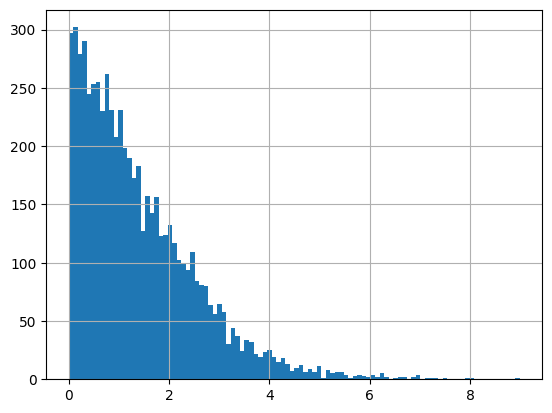

In [42]:
# check how well values agree with each other
orig_measures_df_agg.query("LN_IC50.str.len()>1")["LN_IC50"].apply(lambda x: abs(x[1]-x[0])).hist(bins=100)

<Axes: >

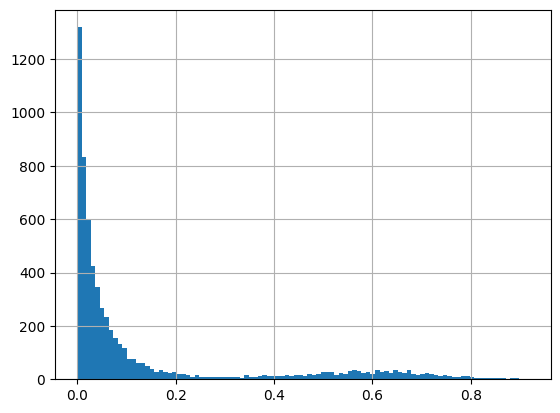

In [43]:
orig_measures_df_agg.query("AUC.str.len()>1")["AUC"].apply(lambda x: abs(x[1]-x[0])).hist(bins=100)

<Axes: >

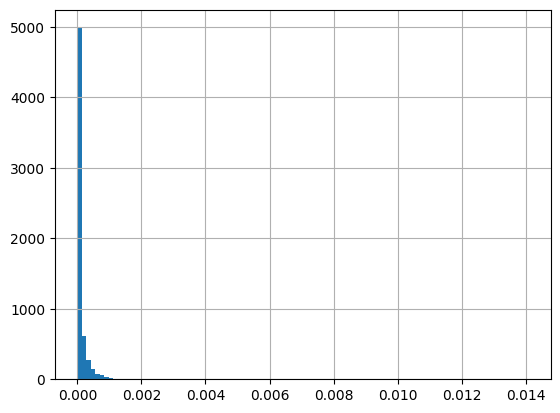

In [44]:
orig_measures_df_agg.query("IC50.str.len()>1")["IC50"].apply(lambda x: abs(x[1]-x[0])).hist(bins=100)

In [45]:
# aggregate mean
orig_measures_df = orig_measures_df.groupby(["CELL_LINE_NAME", "DRUG_NAME"], as_index=False).agg({"LN_IC50": 'mean', "AUC": 'mean', "IC50": 'mean'})
orig_measures_df

,CELL_LINE_NAME,DRUG_NAME,LN_IC50,AUC,IC50
0,22RV1,123138,2.684483,0.950679,0.000015
1,22RV1,123829,0.459784,0.779782,0.000002
2,22RV1,150412,1.531967,0.856380,0.000005
3,22RV1,5-Fluorouracil,2.319585,0.751066,0.000010
4,22RV1,5-azacytidine,3.192165,0.841318,0.000024
...,...,...,...,...,...
235743,no-11,Wee1 Inhibitor,2.275658,0.831706,0.000010
235744,no-11,Wnt-C59,6.463324,0.979944,0.000641
235745,no-11,XAV939,3.852742,0.942834,0.000047
235746,no-11,YK-4-279,4.530254,0.942365,0.000093


In [46]:
# merge curvecurator and original fits
mapped_response_df = viability_df.merge(orig_measures_df, on=["DRUG_NAME", "CELL_LINE_NAME"], how='outer')
mapped_response_df

,Name,SignalQuality,pEC50_curvecurator,Slope,Front,Back,FoldChange,AUC_curvecurator,RMSE,R2,...,drug_id,EC50_curvecurator,IC50_curvecurator,CELL_LINE_NAME,DRUG_NAME,sample,drug,LN_IC50,AUC,IC50
0,CVCL_0001|5352062,0.0,8.089522,10.000000,1.002152,0.000100,-3.142484,0.970510,0.083503,0.925361,...,5352062,8.137252e-09,8.140911e-09,HEL,Romidepsin,CVCL_0001,5352062,-5.027970,0.892340,6.552098e-09
1,CVCL_0002|36314,0.0,8.396003,10.000000,1.273513,0.081264,-3.618923,1.116121,0.127314,0.904100,...,36314,4.017880e-09,4.272182e-09,HL-60,Paclitaxel,CVCL_0002,36314,-4.906881,0.875756,7.395519e-09
2,CVCL_0002|5352062,0.0,8.691853,1.212055,1.027599,0.000100,-2.940780,0.774196,0.029062,0.992164,...,5352062,2.033047e-09,2.125546e-09,HL-60,Romidepsin,CVCL_0002,5352062,-6.094023,0.755228,2.256313e-09
3,CVCL_0004|36314,0.0,8.166454,2.553741,1.163487,0.358872,-0.789264,1.104288,0.099598,0.786507,...,36314,6.816254e-09,1.249613e-08,K-562,Paclitaxel,CVCL_0004,36314,-3.609454,0.940273,2.706662e-08
4,CVCL_0004|5352062,0.0,8.326453,2.605769,0.958683,0.000100,-3.075988,0.847337,0.027443,0.990385,...,5352062,4.715712e-09,4.562531e-09,K-562,Romidepsin,CVCL_0004,5352062,-5.305005,0.825615,4.966673e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,huH-1,MG-132,NaN,NaN,0.626409,0.733394,1.870880e-06
237549,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,huH-1,PD0325901,NaN,NaN,2.883794,0.952753,1.788199e-05
237550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,huH-1,Staurosporine,NaN,NaN,-1.815391,0.532632,1.627743e-07
237551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,no-10,Staurosporine,NaN,NaN,-2.590771,0.431330,7.496222e-08


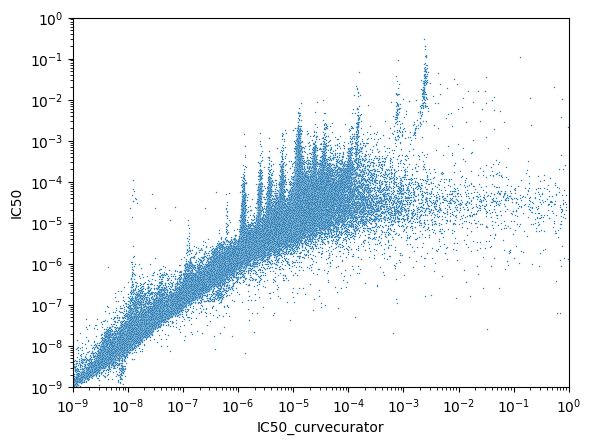

In [55]:
sns.scatterplot(mapped_response_df, x="IC50_curvecurator", y="IC50", s=1)
plt.xlim(1e-9,1e-0)
plt.ylim(1e-9,1e-0)

plt.xscale('log')
plt.yscale('log')

In [48]:
mapped_response_df.query("IC50_curvecurator<0.1")

,Name,SignalQuality,pEC50_curvecurator,Slope,Front,Back,FoldChange,AUC_curvecurator,RMSE,R2,...,drug_id,EC50_curvecurator,IC50_curvecurator,CELL_LINE_NAME,DRUG_NAME,sample,drug,LN_IC50,AUC,IC50
0,CVCL_0001|5352062,0.0,8.089522,10.000000,1.002152,0.000100,-3.142484,0.970510,0.083503,0.925361,...,5352062,8.137252e-09,8.140911e-09,HEL,Romidepsin,CVCL_0001,5352062,-5.027970,0.892340,6.552098e-09
1,CVCL_0002|36314,0.0,8.396003,10.000000,1.273513,0.081264,-3.618923,1.116121,0.127314,0.904100,...,36314,4.017880e-09,4.272182e-09,HL-60,Paclitaxel,CVCL_0002,36314,-4.906881,0.875756,7.395519e-09
2,CVCL_0002|5352062,0.0,8.691853,1.212055,1.027599,0.000100,-2.940780,0.774196,0.029062,0.992164,...,5352062,2.033047e-09,2.125546e-09,HL-60,Romidepsin,CVCL_0002,5352062,-6.094023,0.755228,2.256313e-09
3,CVCL_0004|36314,0.0,8.166454,2.553741,1.163487,0.358872,-0.789264,1.104288,0.099598,0.786507,...,36314,6.816254e-09,1.249613e-08,K-562,Paclitaxel,CVCL_0004,36314,-3.609454,0.940273,2.706662e-08
4,CVCL_0004|5352062,0.0,8.326453,2.605769,0.958683,0.000100,-3.075988,0.847337,0.027443,0.990385,...,5352062,4.715712e-09,4.562531e-09,K-562,Romidepsin,CVCL_0004,5352062,-5.305005,0.825615,4.966673e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234385,CVCL_1453|54679076,0.0,2.094073,1.749019,1.013029,0.000100,-0.102331,1.005996,0.045457,0.264695,...,54679076,8.052425e-03,8.172672e-03,NCI-H1048,ascorbate (vitamin C),CVCL_1453,54679076,10.378807,0.983739,3.217056e-02
234388,CVCL_1562|54679076,0.0,3.100117,10.000000,0.999431,0.325960,-1.616943,0.909370,0.115032,0.795120,...,54679076,7.941137e-04,8.823997e-04,NCI-H446,ascorbate (vitamin C),CVCL_1562,54679076,7.661307,0.884285,2.124532e-03
234391,CVCL_1600|54679076,0.0,2.702890,10.000000,1.141790,0.000100,-0.875144,1.129571,0.188481,0.536550,...,54679076,1.982029e-03,2.032174e-03,NCI-H929,ascorbate (vitamin C),CVCL_1600,54679076,8.181905,0.934908,3.575660e-03
234421,CVCL_1760|54679076,0.0,1.393937,0.549277,1.025575,0.000100,-0.216857,0.979281,0.127940,0.153814,...,54679076,4.037044e-02,4.422453e-02,TE-10,ascorbate (vitamin C),CVCL_1760,54679076,9.380476,0.965462,1.185466e-02


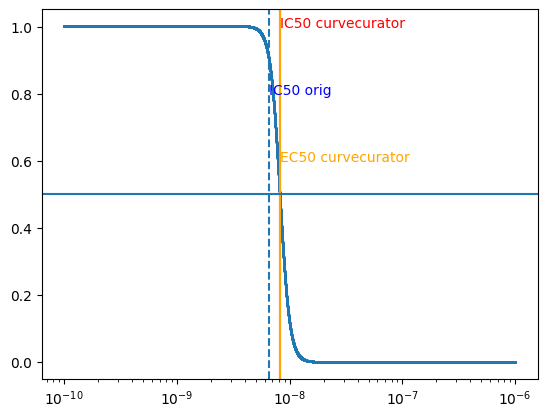

In [59]:
import matplotlib.pyplot as plt
import numpy as np
xvals = np.linspace(-10,-6, 10000)

index = 0
front = mapped_response_df.loc[index, "Front"]
back = mapped_response_df.loc[index, "Back"]
pec50 = mapped_response_df.loc[index, "pEC50_curvecurator"]
ec50 = mapped_response_df.loc[index, "EC50_curvecurator"]

slope = mapped_response_df.loc[index, "Slope"]
ic50 = mapped_response_df.loc[index, "IC50_curvecurator"]
origic50 = mapped_response_df.loc[index, "IC50"]


y = (front - back) / (1 + 10 ** (slope * (xvals + pec50))) + back
plt.scatter(10**xvals, 	y, s=1)


plt.axvline(origic50, linestyle='--')
plt.text(x=origic50, y=0.8, s='IC50 orig', color='blue')

plt.axvline(ic50, color="red")
plt.text(x=ic50, y=1.0, s='IC50 curvecurator', color='red')

plt.axvline(ec50, color="orange")
plt.text(x=ec50, y=0.6, s='EC50 curvecurator', color='orange')

plt.axhline(0.5)

plt.xscale('log')

In [58]:
mapped_response_df.to_csv("GDSC2_for_drevalpy.csv")